## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Reading and Understanding the data.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from csv into BikeDataset
#Setting the instant column as index
BikeDataset = pd.read_csv('day.csv')
pd.set_option('display.max_columns', None)
# Check the head of the dataset
BikeDataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of the data set.
BikeDataset.shape

(730, 16)

In [4]:
#Checking information of the columns present in the data set.
BikeDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Describing the data set.
BikeDataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Visualising the data.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

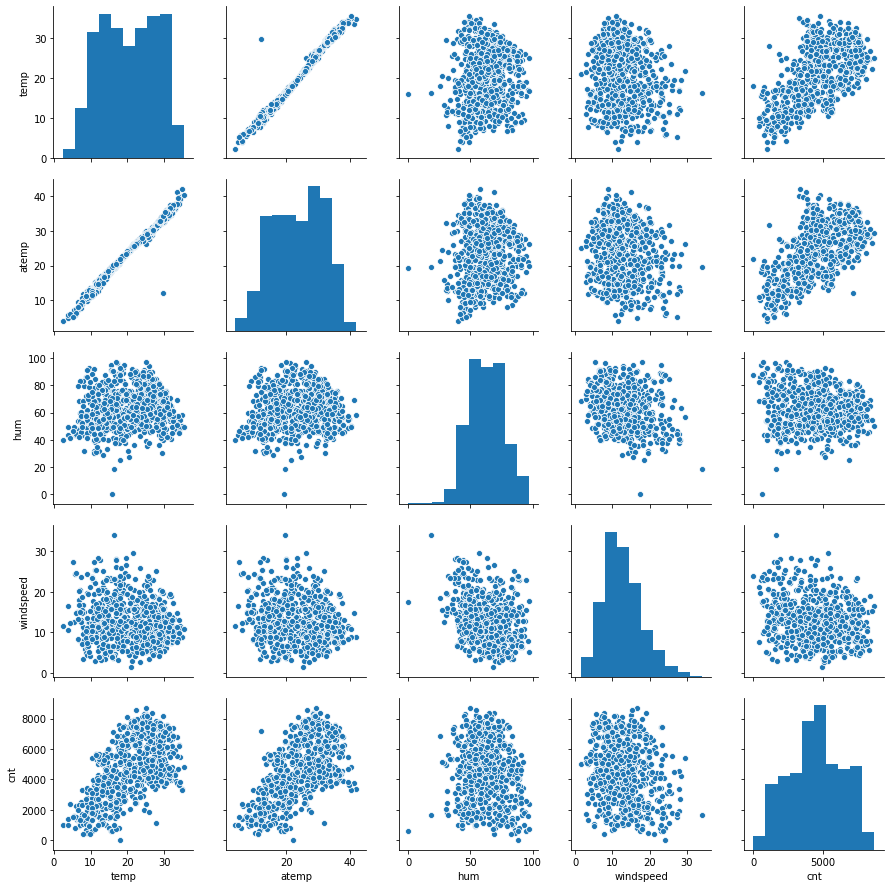

In [7]:
#Visualising some numerical data in the data set using pairplot.
var_list = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(BikeDataset[var_list])
plt.show()

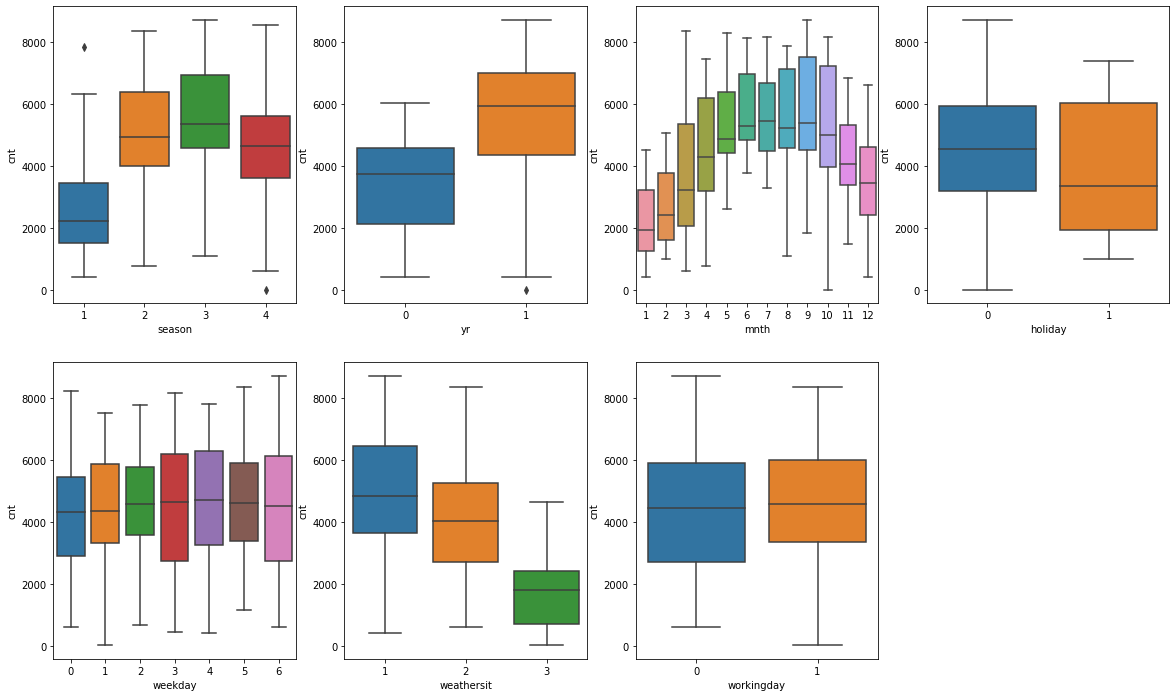

In [8]:
#Visualising some data using box plots and observing the behavior.
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeDataset)
plt.show()

### Data preparation:

In [9]:
# Drop the columns'instant','dteday','registered','casual' from BikeDataset.
BikeDataset.drop(['instant','dteday','registered','casual'], axis = 1, inplace = True)
BikeDataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Substitute the column values of weathersit, season, mnth and weekdaywith categorical string values. 
BikeDataset.weathersit = BikeDataset.weathersit.map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 
                                                     2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                                     3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                                     4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
                                                    })

BikeDataset.season = BikeDataset.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

BikeDataset.mnth = BikeDataset.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

BikeDataset.weekday = BikeDataset.weekday.map({0:'Sun',1:'Mon',2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'})

In [11]:
#Check the dataset
BikeDataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


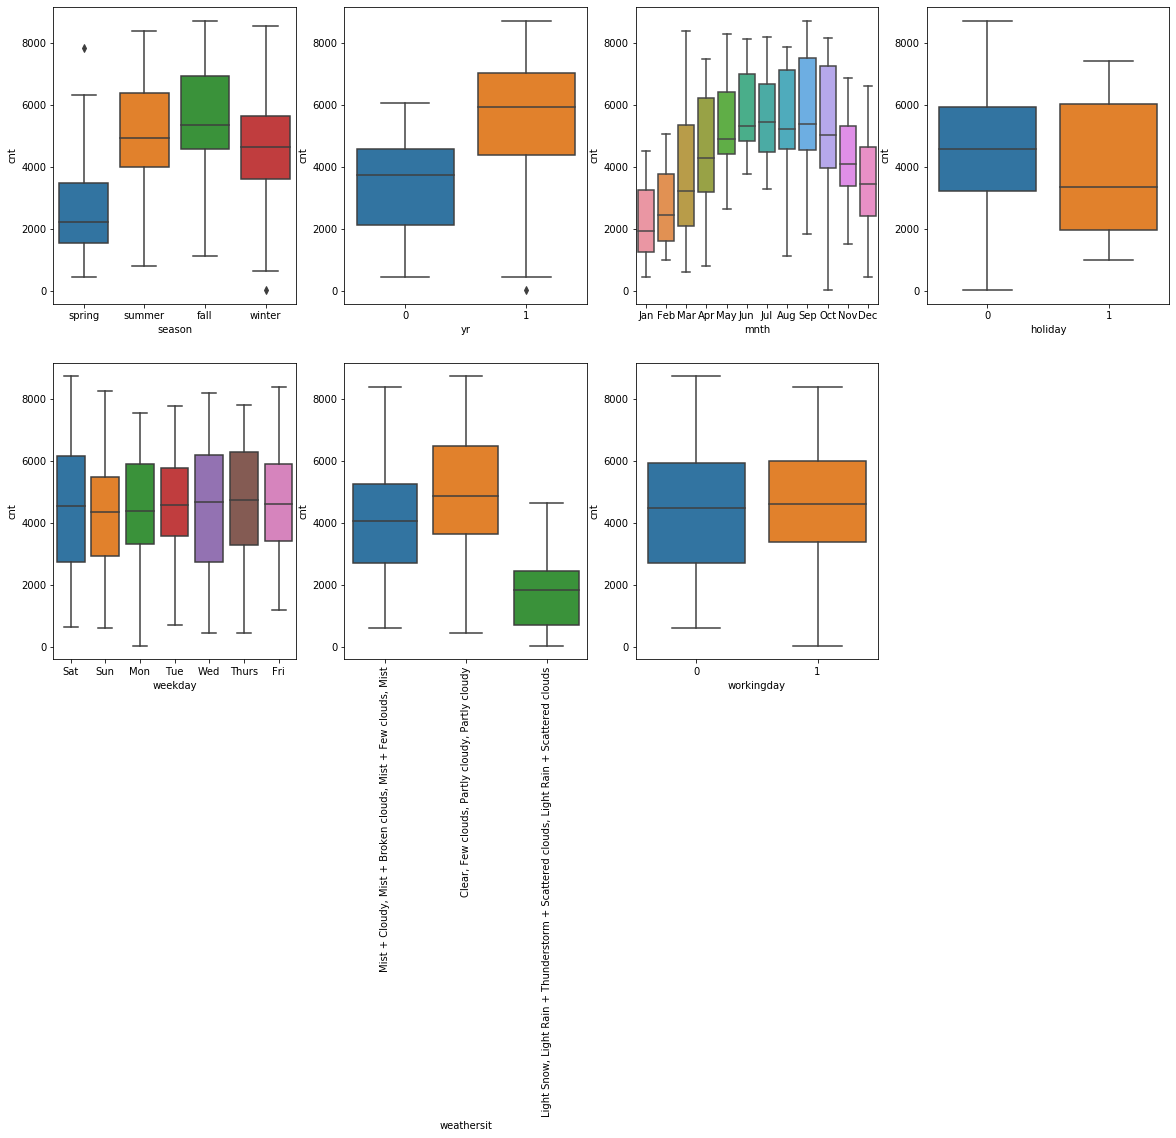

In [12]:
#Visualising some data using box plots and observing the behavior.
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeDataset)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeDataset)
plt.xticks(rotation=90)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeDataset)
plt.show()

In [13]:
# The variable weathersit and season have four levels, mnth has 12 levels and weekday has 7 levels.
# We need to convert these levels into integer values. For this, we will use dummy variables.

situation = pd.get_dummies(BikeDataset['weathersit'],drop_first = True)
seasons = pd.get_dummies(BikeDataset['season'],drop_first = True)
month = pd.get_dummies(BikeDataset['mnth'],drop_first = True)
weekdays = pd.get_dummies(BikeDataset['weekday'], drop_first = True)

In [14]:
# Concatenate these dummy variables with the original data set, i.e., BikeDataset.
BikeDataset = pd.concat([BikeDataset,situation,seasons,month,weekdays],axis = 1)

In [15]:
# Drop the original columns, 'season', 'weathersit','mnth','weekday', from BikeDataset.
BikeDataset.drop(['season', 'weathersit','mnth','weekday'], axis = 1, inplace = True)

In [16]:
BikeDataset.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# Renaming the column names [Clear, Few clouds, Partly cloudy, Partly cloudy as ClearWeather
# Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds as ModerateWeather,
# Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist as MistyWeather

BikeDataset.rename(columns ={'Clear, Few clouds, Partly cloudy, Partly cloudy':'ClearWeather',
                            'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':'ModerateWeather',
                            'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist': 'MistyWeather'},inplace =True)
BikeDataset.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ModerateWeather,MistyWeather,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
# Checking the data set 
print(BikeDataset.info())
print(BikeDataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr                 730 non-null int64
holiday            730 non-null int64
workingday         730 non-null int64
temp               730 non-null float64
atemp              730 non-null float64
hum                730 non-null float64
windspeed          730 non-null float64
cnt                730 non-null int64
ModerateWeather    730 non-null uint8
MistyWeather       730 non-null uint8
spring             730 non-null uint8
summer             730 non-null uint8
winter             730 non-null uint8
Aug                730 non-null uint8
Dec                730 non-null uint8
Feb                730 non-null uint8
Jan                730 non-null uint8
Jul                730 non-null uint8
Jun                730 non-null uint8
Mar                730 non-null uint8
May                730 non-null uint8
Nov                730 non-null uint8
Oct                730 non-null uint8
Sep          

### Splitting the data into train and test datasets

In [19]:
# Dividing 70% of the data into train set and the rest in test set.
from sklearn.model_selection import train_test_split
BD_train,BD_test = train_test_split(BikeDataset, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
# Rescaling train dataset using minmax technique.
var_list = ['temp','atemp','hum','windspeed','cnt']
BD_train[var_list] = scaler.fit_transform(BD_train[var_list])

In [22]:
BD_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ModerateWeather,MistyWeather,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [23]:
BD_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ModerateWeather,MistyWeather,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


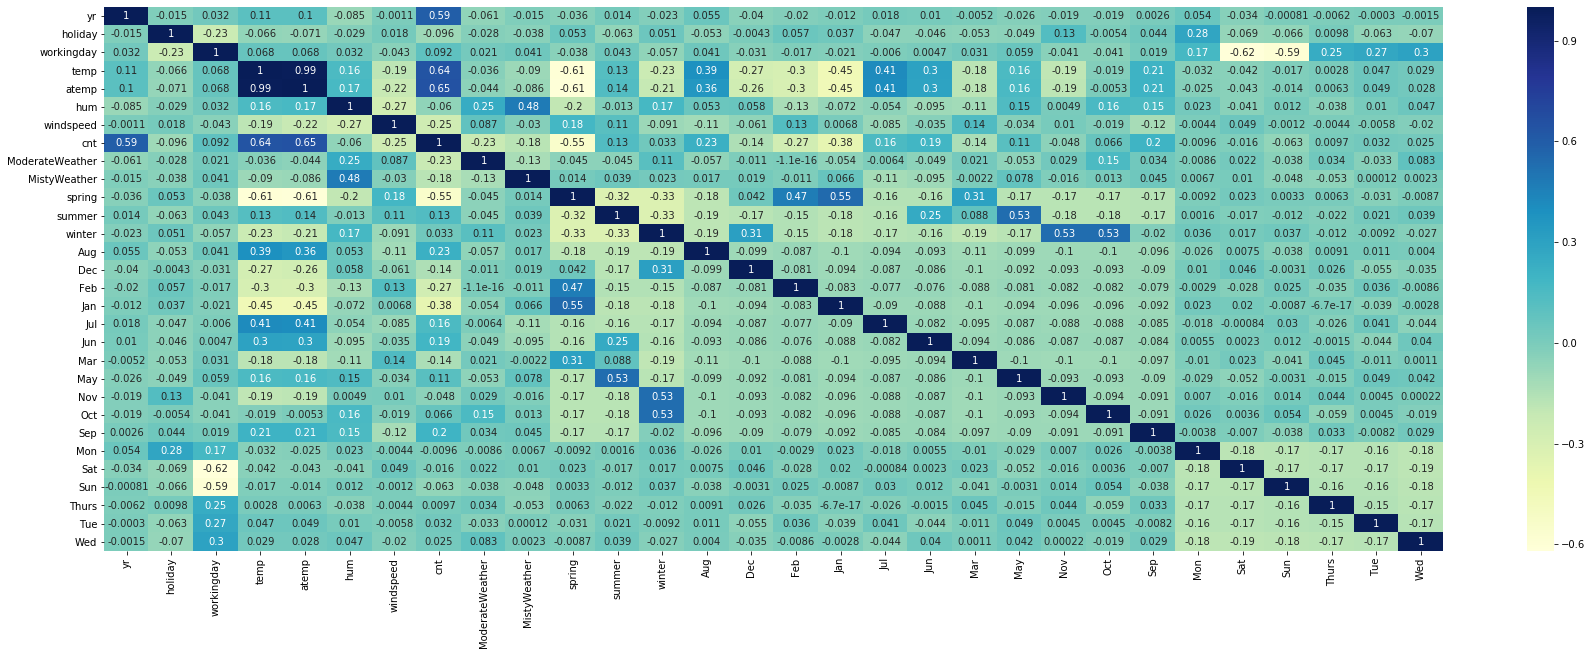

In [24]:
# Plotting a heatmap to display correlation between the variables in the train set.
plt.figure(figsize = (30,10))
ax = sns.heatmap(BD_train.corr(), annot = True, cmap = 'YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)
plt.show()

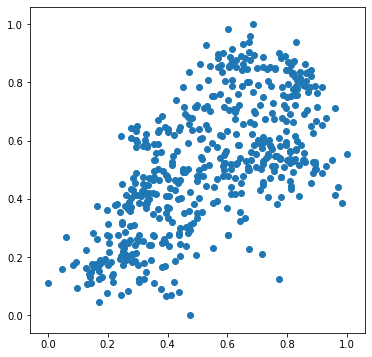

In [25]:
# Let's see a pairplot for cnt vs temp
plt.figure(figsize=[6,6])
plt.scatter(BD_train.temp, BD_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [26]:
y_train = BD_train.pop('cnt')
X_train = BD_train

### Building a linear model.

In [27]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
from sklearn.feature_selection import RFE
# Running RFE with the output number of the variable equal to 15
rfe = RFE(linReg, 15)
rfe = rfe.fit(X_train, y_train)

In [28]:
# Columns that have been identified by RFE method
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'ModerateWeather',
       'MistyWeather', 'spring', 'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [29]:
# Columns that have been removed by RFE method
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thurs', 'Tue', 'Wed'],
      dtype='object')

#### Further assessing the model with RFE shortlisted variables.

In [30]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          8.86e-188
Time:                        12:05:14   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     494   BIC:                            -922.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3650      0.032     

#### We observe that the p-value for the variable 'atemp' is pretty high, i.e., 0.513. Lets eliminate 'atemp' and rebuild the model.

In [31]:
col = col.drop('atemp')
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          7.80e-189
Time:                        12:05:14   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3665      0.032     

#### We now observe that the p-value for the variable 'Dec' is considerably high, i.e., 0.009. Lets eliminate 'Dec' and rebuild the model.

In [32]:
col = col.drop('Dec')
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          1.67e-188
Time:                        12:05:14   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3532      0.032     

#### The p-value for the variable 'Nov' has now become 0.072. Lets eliminate 'Nov' and rebuild the model.

In [33]:
col = col.drop('Nov')
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          5.52e-189
Time:                        12:05:14   Log-Likelihood:                 505.89
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3474      0.031     

#### The p-value for the variable 'Jan' has is pretty high with value 0.028. Lets eliminate 'Jan' and rebuild the model.

In [34]:
col = col.drop('Jan')
X_train_sm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          3.87e-189
Time:                        12:05:14   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3372      0.031     

#### We can now see in above summary that no variable has a high pvalue and also that the r-squared value is 0.838, which means that this model explains almost 84% of the data. We also observe that the Prob(F-Statistics) is less than 0.05 implying that the overall model fit is significant. Let us now check the VIF to find out how much the feature variables are correlated with each other.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.65
3,temp,2.99
8,spring,2.55
4,hum,1.88
9,winter,1.77
7,MistyWeather,1.56
10,Jul,1.29
6,ModerateWeather,1.24
5,windspeed,1.17
11,Sep,1.11


#### The largest VIF observed is 2.99 which is less than 5. The pvalues and VIFs both are in acceptable range, hence, implying that we can make our predictions using this model.

### Residual Analysis of the train data

#### Lets plot a histogram of the error terms and check how they are distributed.

In [36]:
# Predict the y train values from the above decided data set
y_train_pred = lr.predict(X_train_sm)
#print(y_train_cnt.shape)
#print(X_train_lm.shape)
#print(X_train_lm.columns)

Text(0.5, 0, 'Errors')

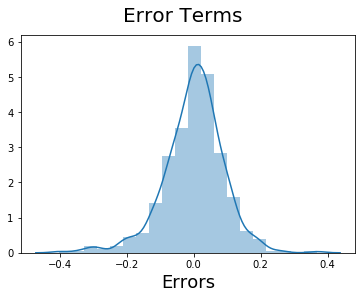

In [37]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### The error terms are normally distributed.

### Making Predictions Using the Final Model

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final observed model.

In [38]:
# Applying scaling on the test set
var_list = ['temp','atemp','hum','windspeed','cnt']
BD_test[var_list] = scaler.fit_transform(BD_test[var_list])
BD_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ModerateWeather,MistyWeather,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Describing the test dataset.
BD_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,ModerateWeather,MistyWeather,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.027397,0.319635,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.163612,0.467403,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Dividing into X_test and y_test
y_test = BD_test.pop('cnt')
X_test = BD_test

In [41]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'ModerateWeather',
       'MistyWeather', 'spring', 'winter', 'Jul', 'Sep'],
      dtype='object')

In [42]:
# Creating X_test_m dataframe by dropping variables from X_test
X_test_m = X_test.drop(X_test.columns.difference(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'ModerateWeather',
       'MistyWeather', 'spring', 'winter', 'Jul', 'Sep']), axis = 1)
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test_m)
X_test_m

,const,yr,holiday,temp,hum,windspeed,ModerateWeather,MistyWeather,spring,winter,Jul,Sep
184,1.0,0,1,0.837241,0.534223,0.149393,0,1,0,0,1,0
535,1.0,1,0,0.911423,0.470417,0.231142,0,0,0,0,0,0
299,1.0,0,0,0.496221,0.777843,0.443398,0,1,0,1,0,0
221,1.0,0,0,0.890387,0.236659,0.449707,0,0,0,0,0,0
152,1.0,0,0,0.821739,0.070765,0.682387,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.224955,0.603829,0.388364,0,1,1,0,0,0
702,1.0,1,0,0.503971,0.667633,0.383644,0,0,0,1,0,0
127,1.0,0,0,0.573725,0.525522,0.132095,0,0,0,0,0,0
640,1.0,1,0,0.745342,0.751160,0.111637,0,1,0,1,0,0


In [43]:
# Predict the cnt values from the above decided data set
y_pred = lr.predict(X_test_m)

In [44]:
# Calculating r-square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8144212561063003

#### The r-square observed for the test data is 0.814, which is not varying so much from the r-square calculated for the train set,that was 0.838.

In [45]:
#Calculating the root mean squared error.
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.102594927108497

### Model Evaluation

Text(0, 0.5, 'y_pred_m')

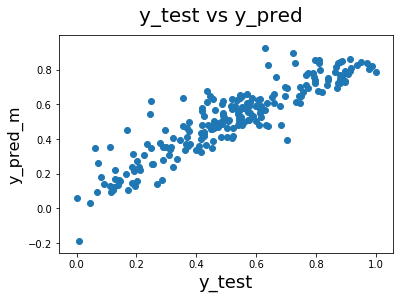

In [46]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m', fontsize = 16)   

In [47]:
#Displaying the test data along with cnt and predicted cnt columns. 
BD_test['cnt'] = y_test
BD_test['predicted_cnt'] = y_pred
BD_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,ModerateWeather,MistyWeather,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,cnt,predicted_cnt
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.704300,0.396451
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.725421,0.892740
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.278853,0.378820
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.545512,0.652066
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.569148,0.605670
